In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf
import scipy


# Preprocessing


In [2]:
CATEGORIES = ['Black','Blue','Brown','Gray', 'Green','Orange','Pink','Purple','Red','White','Yellow','Cream']
DATADIR = './datasets/colors'
IMG_SIZE = 640

In [3]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # 80% for training, 20% for validation
)


In [4]:
train_generator = train_datagen.flow_from_directory(
    DATADIR,
    target_size=(32, 32),
    batch_size=32,
    class_mode='categorical',
    subset='training',
    classes=CATEGORIES
)

Found 2794 images belonging to 12 classes.


In [5]:
validation_generator = train_datagen.flow_from_directory(
    DATADIR,
    target_size=(32, 32),
    batch_size=32,
    class_mode='categorical',
    subset='validation',
    classes=CATEGORIES
)

Found 691 images belonging to 12 classes.


# Creating Model


In [6]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(36, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(len(CATEGORIES), activation='softmax'))

In [7]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [8]:
checkpoint = ModelCheckpoint("best_model.h5", monitor='val_accuracy', save_best_only=True, mode='max')

In [9]:
history = model.fit(
    train_generator,
    epochs=50,
    validation_data=validation_generator,
    callbacks=[checkpoint]
)

Epoch 1/50


88/88 [==============================] - 46s 503ms/step - loss: 1.6991 - accuracy: 0.4166 - val_loss: 1.3416 - val_accuracy: 0.5210
Epoch 2/50


e:\Projek\color-classification\venv\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


88/88 [==============================] - 18s 205ms/step - loss: 1.1307 - accuracy: 0.6042 - val_loss: 1.0083 - val_accuracy: 0.6339
Epoch 3/50
88/88 [==============================] - 18s 208ms/step - loss: 0.9971 - accuracy: 0.6414 - val_loss: 0.9733 - val_accuracy: 0.6657
Epoch 4/50
88/88 [==============================] - 18s 210ms/step - loss: 0.9838 - accuracy: 0.6482 - val_loss: 0.9969 - val_accuracy: 0.6686
Epoch 5/50
88/88 [==============================] - 19s 210ms/step - loss: 0.9011 - accuracy: 0.6922 - val_loss: 0.8492 - val_accuracy: 0.7120
Epoch 6/50
88/88 [==============================] - 18s 206ms/step - loss: 0.8183 - accuracy: 0.7266 - val_loss: 0.8308 - val_accuracy: 0.7192
Epoch 7/50
88/88 [==============================] - 16s 186ms/step - loss: 0.7847 - accuracy: 0.7344 - val_loss: 0.8789 - val_accuracy: 0.7308
Epoch 8/50
88/88 [==============================] - 16s 185ms/step - loss: 0.7689 - accuracy: 0.7312 - val_loss: 0.8869 - val_accuracy: 0.7091
Epoch 9/50

In [10]:
test_loss, test_acc = model.evaluate(validation_generator)
print(f'Test accuracy: {test_acc}')

22/22 [==============================] - 4s 161ms/step - loss: 0.8317 - accuracy: 0.7800
Test accuracy: 0.7800289392471313


In [11]:
predictions = model.predict(validation_generator)
predicted_classes = np.argmax(predictions, axis=1)

22/22 [==============================] - 4s 163ms/step


In [12]:
actual_classes = validation_generator.classes

In [13]:
conf_mat = confusion_matrix(actual_classes, predicted_classes)

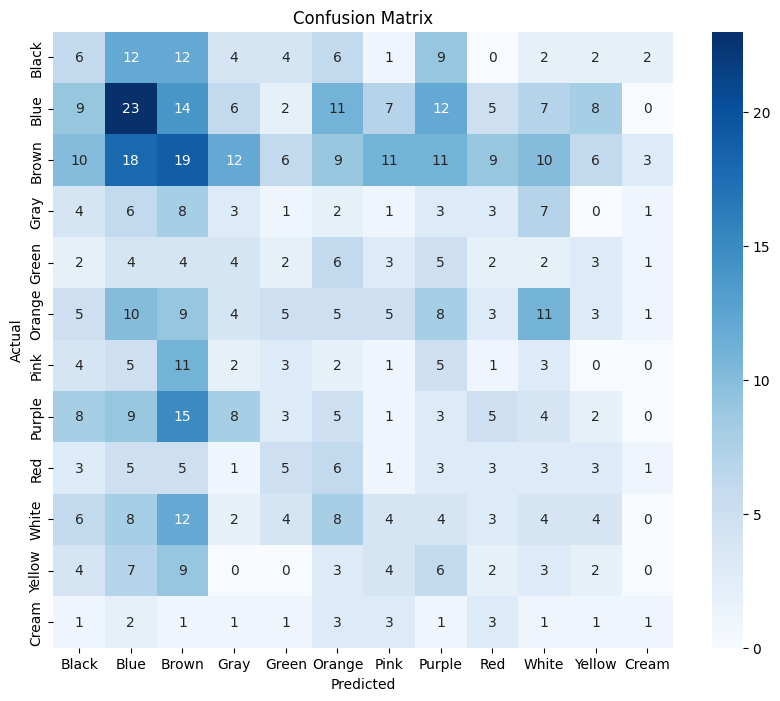

In [14]:
plt.figure(figsize=(10, 8))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=CATEGORIES, yticklabels=CATEGORIES)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [15]:
# Save the final model
model.save('color_classification_cnn_model.h5')

e:\Projek\color-classification\venv\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
